In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv
/kaggle/input/banana/banana_quality.csv


In [2]:
# Classification Glass Model
# Import necessary libraries 
import os 
import pandas as pd 
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


2025-04-11 12:30:54.410894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744374654.632867      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744374654.696610      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
class_df = pd.read_csv('/kaggle/input/banana/banana_quality.csv')
print(class_df.head())

       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  


In [4]:
# This dataset has no missing values
# class_df.dropna(inplace=True)

# Separate Features and Target Variables
class_X = class_df.drop(columns='Quality')
class_y = class_df['Quality']
class_num_cols = list(class_X.select_dtypes(include=[np.number]).columns.values)
class_cat_cols = list(class_X.select_dtypes(exclude=[np.number]).columns.values)

# Create Train & Test Data
class_X_train, class_X_test, class_y_train, class_y_test = train_test_split(
    class_X,
    class_y,
    test_size=0.3,
    random_state=42
)

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
class_dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
class_dt.fit(class_X_train, class_y_train)

# Predict on the test data and evaluate the model
class_y_pred = class_dt.predict(class_X_test)

# Classification Report
print(classification_report(class_y_pred, class_y_test))

              precision    recall  f1-score   support

         Bad       0.90      0.78      0.83      1328
        Good       0.76      0.89      0.82      1072

    accuracy                           0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.84      0.83      0.83      2400



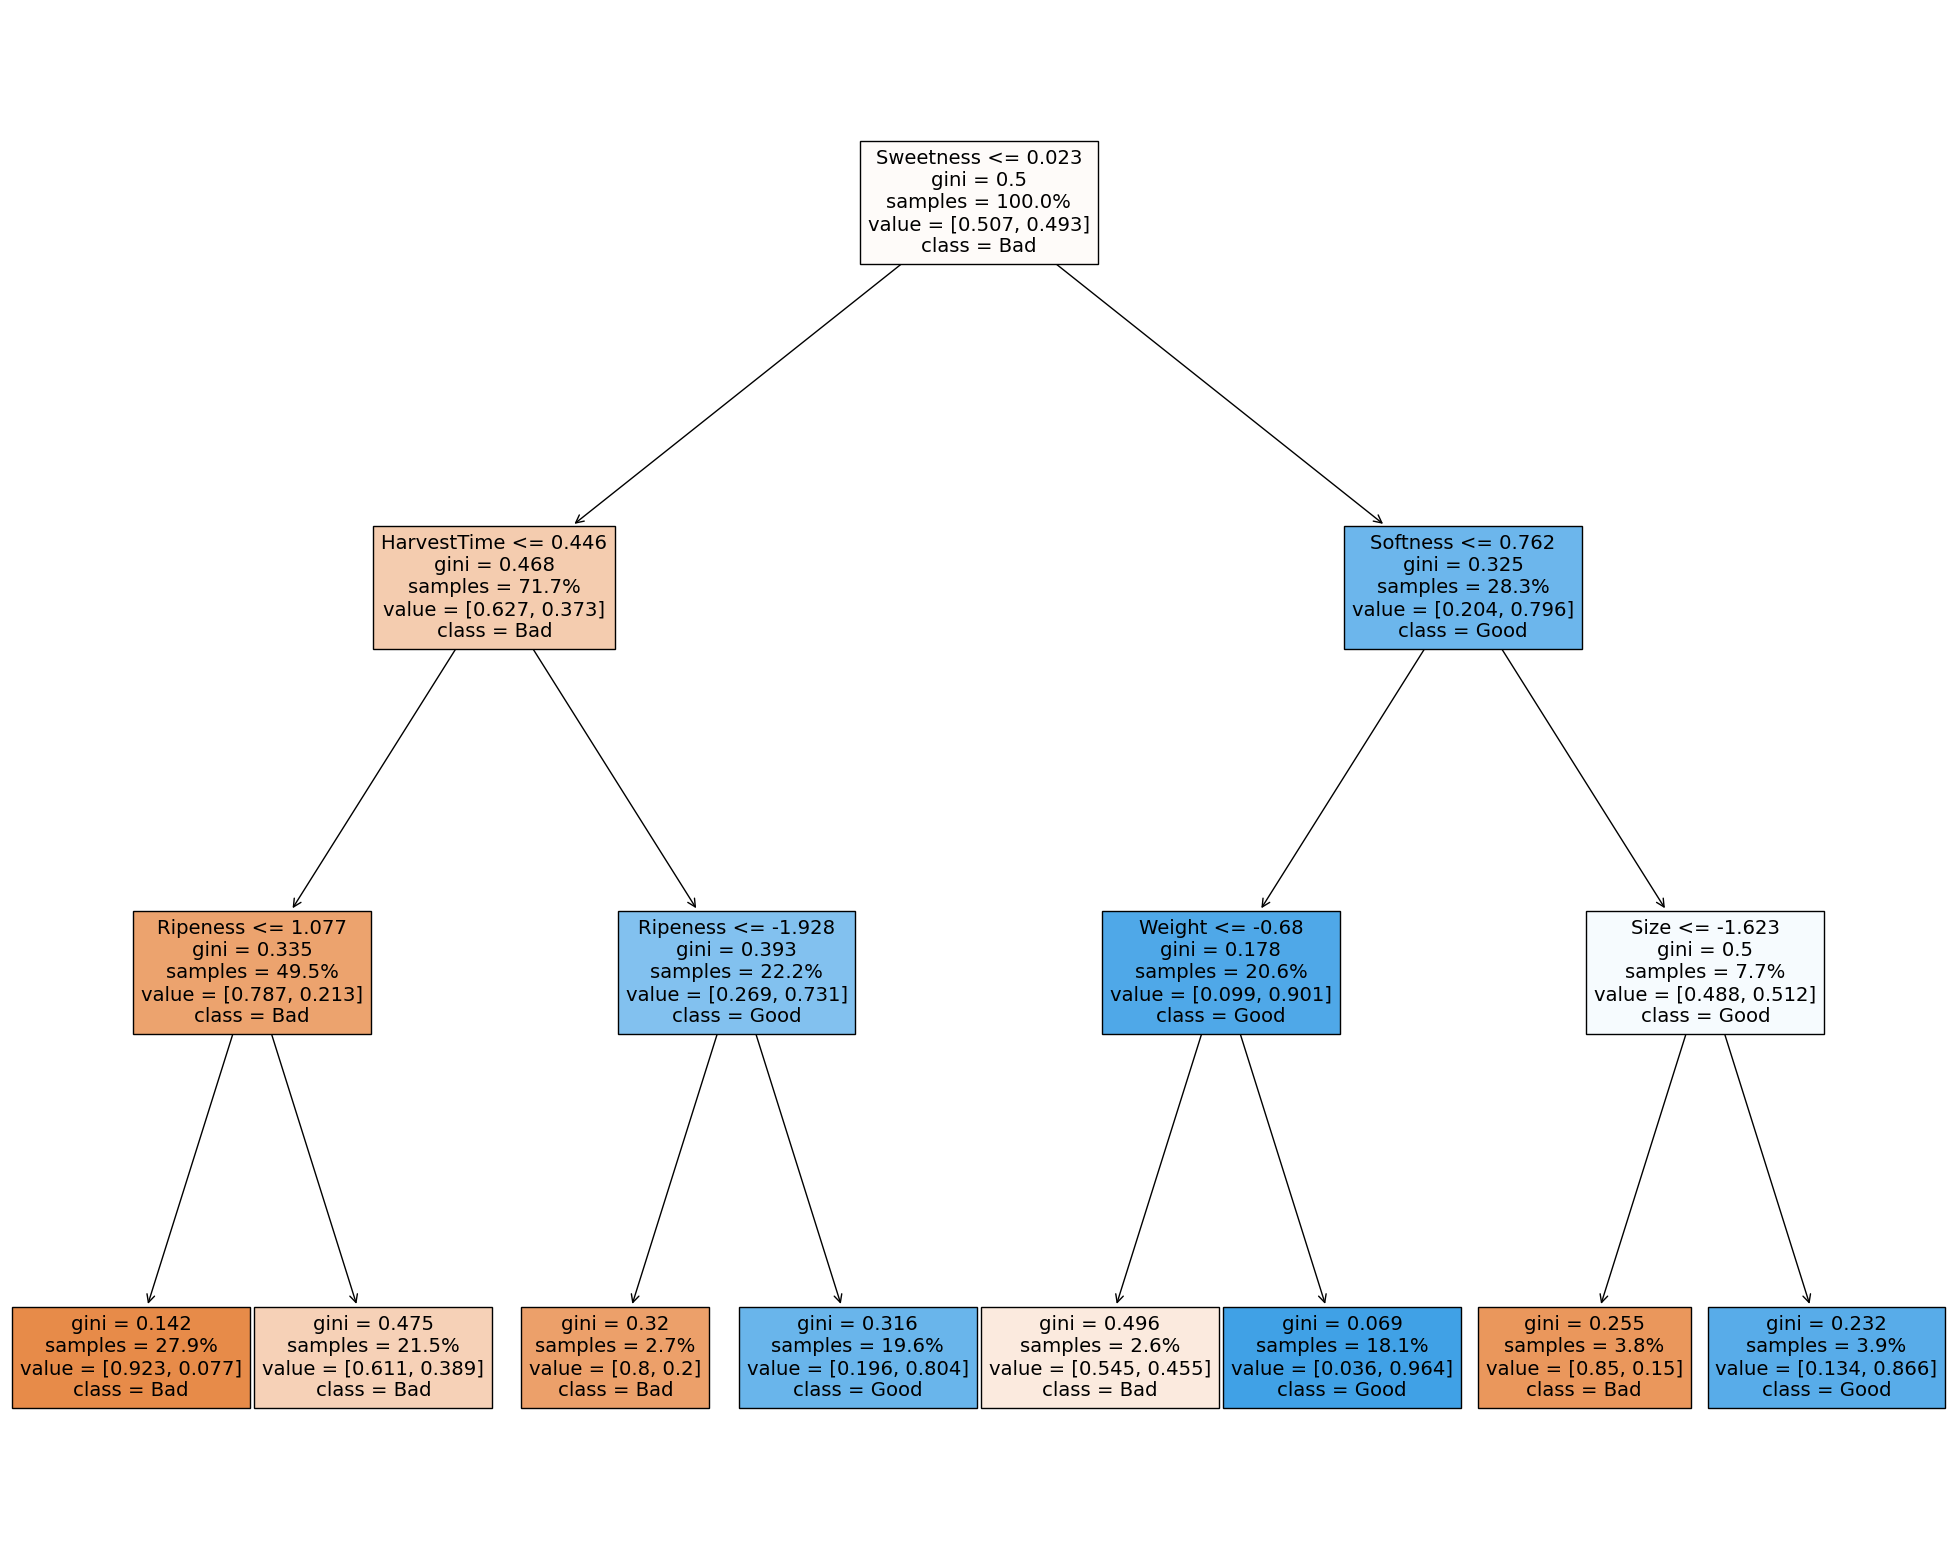

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25, 20))
tree_plot = plot_tree(
    class_dt,
    feature_names=list(class_X_train.columns),
    class_names=['Bad', 'Good'],
    filled=True,
    proportion=True
)

In [7]:
# Classification Black Model
reg_df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv') 
print(reg_df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [8]:
from sklearn.ensemble import RandomForestClassifier
# Build model

class_rf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)
class_rf.fit(class_X_train, class_y_train)

# Predict on the test data and evaluate the model
class_y_pred = class_rf.predict(class_X_test)

# Classification Report
print(classification_report(class_y_pred, class_y_test))

              precision    recall  f1-score   support

         Bad       0.97      0.97      0.97      1156
        Good       0.97      0.97      0.97      1244

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



In [9]:
# Regression Glass Model
# This dataset has no missing value
# reg_df.dropna(inplace=True)

# Split Features (X) and Target (y) 
reg_X = reg_df.drop(columns=["Performance Index"]) # Replace 'Target' with actual target column name
reg_y = reg_df["Performance Index"] 
reg_num_cols = list(reg_X.select_dtypes(include=[np.number]).columns.values) 
reg_cat_cols = list(reg_X.select_dtypes(exclude=[np.number]).columns.values) 

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Recalculate categorical columns in case reg_X was changed
reg_cat_cols = list(reg_X.select_dtypes(exclude=[np.number]).columns.values)

# One-hot encode only if there are any categorical columns
if reg_cat_cols:
    encoder = OneHotEncoder(sparse_output=False, drop="first")
    encoded_df = pd.DataFrame(
        encoder.fit_transform(reg_X[reg_cat_cols]),
        columns=encoder.get_feature_names_out(reg_cat_cols),
    )
    reg_X = reg_X.drop(columns=reg_cat_cols).reset_index(drop=True)
    reg_X = pd.concat([reg_X.reset_index(drop=True), encoded_df], axis=1)

In [11]:
from sklearn.linear_model import LinearRegression

# Buid & train model
reg_linear = LinearRegression()
reg_linear.fit(reg_X_train, reg_y_train)

NameError: name 'reg_X_train' is not defined

In [ ]:
# Evaluate model 
r2_score = reg_linear.score(reg_X_test, reg_y_test) 
print(f"Final model R² Score: {r2_score}")

In [ ]:
print("Model coefficients:\n")
for i in range(reg_X.shape[1]):
   print(reg_X.columns[i], "=", reg_linear.coef_[i].round(5))

In [ ]:
from sklearn.linear_model import LinearRegression

# Buid & train model
reg_linear = LinearRegression()
reg_linear.fit(reg_X_train, reg_y_train)

# Evaluate model
r2_score = reg_linear.score(reg_X_test, reg_y_test)
print(f"Final model R² Score: {r2_score}")

In [ ]:
print("Model coefficient:\n")
for i in range(reg_X.shape[1]):
    print(reg_X.columns[i], "=", reg_linear.coef_[i].round(5))

In [ ]:
# Regression Glass Model
reg_df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv') 
print(reg_df.head())

In [ ]:
# This dataset has no missing values
# reg_df.dropna(inplace=True)
# Split Features (X) and Target (y)

reg_X = reg_df.drop(columns=["Performance Index"]) # Replace 'Target' with actual target column name
reg_y = reg_df["Performance Index"]
reg_num_cols = list(reg_X.select_dtypes(include=[np.number]).columns.values)
reg_cat_cols = list(reg_X.select_dtypes(exclude=[np.number]).columns.values)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Recalculate categorical columns in case reg_X changed
reg_cat_cols = list(reg_X.select_dtypes(exclude=[np.number]).columns.values)

# Convert Categorical Data into Numerical (One-Hot Encoding)
if reg_cat_cols:
    encoder = OneHotEncoder(sparse_output=False, drop="first")
    encoded_df = pd.DataFrame(
        encoder.fit_transform(reg_X[reg_cat_cols]),
        columns=encoder.get_feature_names_out(reg_cat_cols),
    )

    # Remove original categorical columns and concatenate the new encoded ones
    reg_X = reg_X.drop(columns=reg_cat_cols).reset_index(drop=True)
    reg_X = pd.concat([reg_X, encoded_df], axis=1)

# Split Dataset into Train and Test Sets
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(
    reg_X, reg_y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

# Buid & train model 
reg_linear = LinearRegression() 
reg_linear.fit(reg_X_train, reg_y_train)

# Evaluate model 
r2_score = reg_linear.score(reg_X_test, reg_y_test) 
print(f"Final model R² Score: {r2_score}")

In [ ]:
print("Model coefficients:\n")
for i in range(reg_X.shape[1]):
  print(reg_X.columns[i], "=", reg_linear.coef_[i].round(5))

In [ ]:
from sklearn.linear_model import LinearRegression

# Buid & train model
reg_linear = LinearRegression()
reg_linear.fit(reg_X_train, reg_y_train)

# Evaluate model
r2_score = reg_linear.score(reg_X_test, reg_y_test)
print(f"Final model R² Score: {r2_score}")

In [ ]:
#Regression Black Model


from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras import backend as K 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from tensorflow.keras import Input

In [ ]:
def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred)) # Residual sum of squares 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) # Total sum of squares 
    return 1 - (SS_res / (SS_tot + K.epsilon())) # Add epsilon to avoid division by zero

In [ ]:
# Define model 
reg_neural = model = Sequential([
    Input(shape=(reg_X_train.shape[1],)),  # Define input shape explicitly
    Dense(1000, activation='relu'),        # Input layer 
    Dropout(0.5), 
    Dense(500, activation='relu'),         # Hidden layer with 500 neurons and ReLU activation 
    Dropout(0.5), 
    Dense(250, activation='relu'), 
    Dropout(0.5), 
    Dense(1, activation='linear')          # Output layer with a single neuron (for regression) 
])

reg_neural.compile(optimizer="adam", loss="mse", metrics=[r2_score])

In [ ]:
# Train model
reg_neural.fit(
    reg_X_train, reg_y_train,
    validation_data=(reg_X_test, reg_y_test), # Track performance on test set
    epochs=50, # Adjust epochs as needed
    batch_size=32, # Common batch size
    verbose=1 # Show training progress
)

In [ ]:
# Evaluate model
loss, r2 = reg_neural.evaluate(reg_X_test, reg_y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Final model R² Score: {r2}")

In [ ]:
#Counterfactual
!pip install dice-ml

In [ ]:
import dice_ml

from dice_ml.utils import helpers # helper functions
class_dice_train = pd.concat([class_X_train, class_y_train], axis=1)
print(class_dice_train)

# Dataset for training an ML model
# Continuous features need to be specified as they are perturbed differently

class_d = dice_ml.Data(dataframe=class_dice_train,
continuous_features=['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime',
                     'Ripeness', 'Acidity'],outcome_name='Quality')

# Pre-trained ML model
class_m = dice_ml.Model(model=class_rf, backend='sklearn', model_type='classifier')

# DiCE explanation instance
class_exp = dice_ml.Dice(class_d,class_m, method='random')

In [ ]:
# Generate counterfactual examples
query_instance = class_X_test[0:1]
dice_exp = class_exp.generate_counterfactuals(query_instance, total_CFs=3,
desired_class="opposite")

# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe(show_only_changes=True)

In [ ]:
query_instance = class_X_test[0:1]
dice_exp = class_exp.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_class="opposite",
    features_to_vary=['Sweetness', 'Size'],
    permitted_range = {'Size': [-5, 5]} 
) 
dice_exp.visualize_as_dataframe(show_only_changes=True)

In [ ]:
# LIME
from sklearn.ensemble import RandomForestClassifier

# Build model
class_rf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap =
True)

class_rf.fit(class_X_train, class_y_train)

# Predict on the test data and evaluate the model
class_y_pred = class_rf.predict(class_X_test)

# Classification Report
print(classification_report(class_y_pred, class_y_test))

In [ ]:
# Calling the explain_instance method by passing in the:
# 1) with test vector (fourth in this case)
# 2) prediction function used by our prediction model('reg_neural' in this case)
# 3) the top features which we want to see, denoted by k

from lime.lime_tabular import LimeTabularExplainer

# Initialize the explainer
reg_explainer_lime = LimeTabularExplainer(
    training_data=reg_X_train.values,
    feature_names=reg_X_train.columns.tolist(),
    mode='regression'
)

# Calling the explain_instance method
reg_exp_lime = reg_explainer_lime.explain_instance(
    reg_X_test.values[3], reg_neural.predict, num_features=5)

# Visualize the explanations
reg_exp_lime.show_in_notebook() #can import and show the visual representations of explanation


In [ ]:
from lime import lime_tabular

# Fit the Explainer on the training data set using the LimeTabularExplainer
reg_explainer_lime = lime_tabular.LimeTabularExplainer(reg_X_train.values,
                                                       feature_names=list(reg_X_train.columns),
                                                       class_names=['Performance Index'],
                                                       verbose=True,
                                                       mode='regression' # “classification” or “regression”
                                                      )

In [ ]:
class_explainer_lime = lime_tabular.LimeTabularExplainer(class_X_train.values,
                                                         feature_names = list(class_X_train.columns),
                                                         class_names = ['Bad', 'Good'],
                                                         verbose=True,
                                                         mode='classification')

In [ ]:
class_exp_lime = class_explainer_lime.explain_instance(
class_X_test.iloc[0], class_rf.predict_proba,
num_features=5
)

class_exp_lime.show_in_notebook()